## Asignment 3
Mia Miletic (63240481)

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

### 1st part

For the first part of the assignment, I will use the preprocessed "Communities and Crime" dataset I used in the previous assignment and preprocessed there.

In [23]:
df = pd.read_csv('cleaned_data.csv') 

# split the data into training and testing sets 
X = df.drop(['ViolentCrimesPerPop'], axis=1)
y = df['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [24]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# possible regularization parameters
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# fit the models
ridge_cv = RidgeCV(alphas=alphas)
lasso_cv = LassoCV(alphas=alphas)
ridge_cv.fit(X_train_scaled, y_train)
lasso_cv.fit(X_train_scaled, y_train)

ridge_pred = ridge_cv.predict(X_test_scaled)
lasso_pred = lasso_cv.predict(X_test_scaled)

ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_mae = mean_absolute_error(y_test, ridge_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)

print("Optimal Ridge alpha:", ridge_cv.alpha_,  "; MSE: ", ridge_mse, "; MAE: ", ridge_mae)
print("Optimal Lasso alpha:", lasso_cv.alpha_,"; MSE: ", lasso_mse, "; MAE: ", lasso_mae)


Optimal Ridge alpha: 100.0 ; MSE:  0.016903170083830597 ; MAE:  0.09344199013190214
Optimal Lasso alpha: 0.001 ; MSE:  0.016965930799466837 ; MAE:  0.0930982829685


Compare the attributes selected with forward attribute selection (the results from the previous assignment) with the attributes lasso selected.

In [25]:
#import the previous assignment to use forwards attribute selection and its results

import nbimporter
import Miletic_assignment2 as prev_assignment

In [26]:
# check the attributes selected by each method

lasso_selected_attributes = X_train.columns[lasso_cv.coef_ != 0].tolist()
print("Attributes selected by Lasso:", lasso_selected_attributes)

selected_by_forward = prev_assignment.forward_attribute_selection(X_train, y_train)
print("Attributes selected by Forward Selection:", selected_by_forward)


Attributes selected by Lasso: ['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctUnemployed', 'PctEmploy', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec8', 'PctRecImmig10', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameCity85', 'LandArea', 'PopDens', 'PctUsePubTrans', 'LemasPctOfficDrugUn']
Attributes selected by Forward S

In [27]:
# compare the number of attributes selected by Lasso and Forward Selection
print(f"Number of attributes from Lasso selection: {len(lasso_selected_attributes)}")
print(f"Number of attributes from Forward attribute selection: {len(selected_by_forward)}")

# Intersection 
intersection = list(set(selected_by_forward) & set(lasso_selected_attributes))
print("Intersection:", intersection)
print(f"Intersection length = {len(intersection)}")

# difference
difference = list(set(selected_by_forward) - set(lasso_selected_attributes))
print("Difference:", difference)
print(f"Difference length = {len(difference)}")

Number of attributes from Lasso selection: 58
Number of attributes from Forward attribute selection: 44
Intersection: ['PctUsePubTrans', 'PctWorkMom', 'RentLowQ', 'agePct12t21', 'racePctAsian', 'HousVacant', 'whitePerCap', 'PctPopUnderPov', 'agePct12t29', 'HispPerCap', 'indianPerCap', 'pctWRetire', 'OtherPerCap', 'MalePctDivorce', 'MedRent', 'AsianPerCap', 'pctWFarmSelf', 'PersPerOccupHous', 'MedRentPctHousInc', 'PctEmploy', 'pctWInvInc', 'NumStreet', 'racepctblack', 'MalePctNevMarr', 'PctPersOwnOccup', 'pctUrban', 'PctSameCity85', 'NumImmig', 'PctPersDenseHous', 'PctForeignBorn', 'pctWWage', 'PctVacantBoarded', 'PctVacMore6Mos', 'PctKids2Par', 'MedOwnCostPctIncNoMtg']
Intersection length = 35
Difference: ['PctNotSpeakEnglWell', 'NumUnderPov', 'PctLargHouseFam', 'TotalPctDiv', 'PctLargHouseOccup', 'PctOccupMgmtProf', 'PctBSorMore', 'OwnOccLowQuart', 'racePctWhite']
Difference length = 9


Linear regression with Lasso attributes; MSE:  0.017635114529753835 ; MAE:  0.09718060117139818
Linear regression with Forward attributes; MSE:  0.017393158258977002 ; MAE:  0.09481554074101037


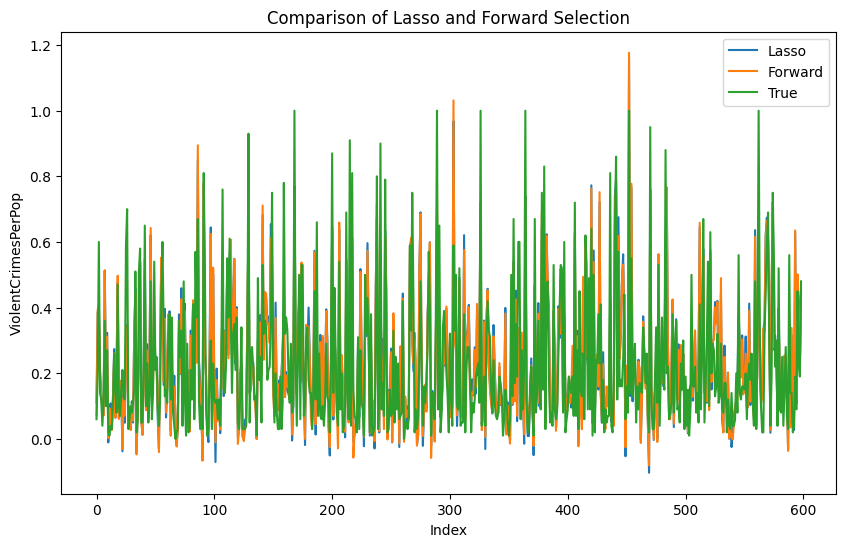

In [28]:
# compare linear regression with attributes selected by Lasso and Forward Selection

X_train_lasso = X_train[lasso_selected_attributes]
X_test_lasso = X_test[lasso_selected_attributes]

X_train_forward = X_train[selected_by_forward]
X_test_forward = X_test[selected_by_forward]

model = LinearRegression()
model.fit(X_train_lasso, y_train)
lasso_pred = model.predict(X_test_lasso)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)

model.fit(X_train_forward, y_train)
forward_pred = model.predict(X_test_forward)
forward_mse = mean_squared_error(y_test, forward_pred)
forward_mae = mean_absolute_error(y_test, forward_pred)

print("Linear regression with Lasso attributes; MSE: ", lasso_mse, "; MAE: ", lasso_mae)
print("Linear regression with Forward attributes; MSE: ", forward_mse, "; MAE: ", forward_mae)

# plot
plt.figure(figsize=(10, 6))
plt.plot(lasso_pred, label='Lasso')
plt.plot(forward_pred, label='Forward')
plt.plot(y_test.values, label='True')
plt.title('Comparison of Lasso and Forward Selection')
plt.xlabel('Index')
plt.ylabel('ViolentCrimesPerPop')
plt.legend()
plt.show()

Lasso's regularization approach allows it to handle more features by shrinking coefficients. This means it can handle a larger number of features by reducing the impact of less important ones rather than completely excluding them, while Forward Attribute Selection's stepwise approach is more conservative, leading to fewer features being selected.

### 2nd part
In this part of the homework, we will implement ridge regression with:
- gradient descent
- stochastic gradient descent

and test it on the "Wine quality" data.


In [29]:
import pandas as pd

df = pd.read_csv("winequality-white.csv", sep=';', quotechar='"')

df.fillna(df.mean(), inplace=True)

df.head()

X = df.drop(['quality'], axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

scaler = StandardScaler()
X_wine_train_scaled = scaler.fit_transform(X_train)
X_wine_test_scaled = scaler.transform(X_test)

#bias term to the features
X_wine_train_scaled = np.c_[np.ones(X_wine_train_scaled.shape[0]), X_wine_train_scaled]
X_wine_test_scaled = np.c_[np.ones(X_wine_test_scaled.shape[0]), X_wine_test_scaled]

X.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


#### Gradient descent

In [30]:
def ridge_regression_gd(X, y, learning_rate, alpha, iterations=1000):
    X = np.array(X)
    y = np.array(y)
    N, n = X.shape
    theta = np.zeros(n)

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        
        gradient = (1 / N) * (X.T.dot(errors)) + alpha * theta
        theta -= learning_rate * gradient
    
    return theta


In [31]:
start_time_gd = time.time()
ridge_gd = ridge_regression_gd(X_wine_train_scaled, y_train,0.001, 0.01, iterations=1000)
convergence_time_gd = time.time() - start_time_gd

# predict
pred_gd = X_wine_test_scaled.dot(ridge_gd)

ridge_gd_mse = mean_squared_error(y_test, pred_gd)

print("Ridge GD:", ridge_gd)
print("Ridge GD MSE:", ridge_gd_mse)

Ridge GD: [ 3.69168932 -0.03819741 -0.10067925  0.01092676  0.02844984 -0.06623397
  0.05334468 -0.03306842 -0.09770104  0.04436616  0.04269228  0.20781246]
Ridge GD MSE: 4.937420583496541


#### Stochastic gradient descent

In [32]:
def ridge_regression_sgd(X, y, learning_rate=0.01, alpha=1.0, iterations=1000, conv_threshold=1e-6, tol=1e-6):
    X, y = np.array(X), np.array(y)
    N, n = X.shape
    theta = np.zeros(n)

    for _ in range(iterations):
        for i in np.random.permutation(N):
            xi, yi = X[i], y[i]
            error = xi.dot(theta) - yi
            gradient = xi * error + alpha * theta
            theta -= learning_rate * gradient

    return theta


In [33]:
start_time_sgd = time.time()
ridge_sgd = ridge_regression_sgd(X_wine_train_scaled, y_train, learning_rate=0.001, alpha=0.01, iterations=1000)
convergence_time_sgd = time.time() - start_time_sgd

#prediction
pred_sgd = X_wine_test_scaled.dot(ridge_sgd)

print("Ridge SGD:", ridge_sgd)

ridge_sgd_mse = mean_squared_error(y_test, pred_sgd)

print("Ridge SGD MSE:", ridge_sgd_mse)

Ridge SGD: [ 5.80036279e+00  5.52715794e-03 -1.59701762e-01  5.82098723e-03
  3.56707641e-01 -1.59171532e-02  8.11725767e-02 -2.97865701e-03
 -3.35677310e-01  9.54734552e-02  8.99550555e-02  2.97607102e-01]
Ridge SGD MSE: 0.4969576242975605


Finding optimal learning rate and comparing the results

In [34]:
learning_rates = [0.001, 0.003,0.06, 0.01, 0.03, 0.06, 0.1]
opt_lr = None
opt_mse = None
print("Ridge GD:")
for lr in learning_rates:
    ridge_gd = ridge_regression_gd(X_wine_train_scaled, y_train, learning_rate=lr, alpha=0.1, iterations=1000)
    pred_gd = X_wine_test_scaled.dot(ridge_gd)
    mse = mean_squared_error(y_test, pred_gd)
    print(f"Learning rate: {lr}; MSE: {mse}")
    if opt_lr is None or mse < opt_mse:
        opt_lr = lr
        opt_mse = mse
print(f"Ridge GD: Optimal learning rate: {opt_lr}; MSE: {opt_mse}")
print(f"Convergence time for GD: {convergence_time_gd}")

print("\nRidge SGD:")
opt_lr = None
opt_mse = None
for lr in learning_rates:
    ridge_sgd = ridge_regression_sgd(X_wine_train_scaled, y_train, learning_rate=lr, alpha=0.1, iterations=1000)
    pred_sgd = X_wine_test_scaled.dot(ridge_sgd)
    mse = mean_squared_error(y_test, pred_sgd)
    print(f"Learning rate: {lr}; MSE: {mse}")
    if opt_lr is None or mse < opt_mse:
        opt_lr = lr
        opt_mse = mse

print(f"Ridge SGD: Optimal learning rate: {opt_lr}; MSE: {opt_mse}")
print(f"Convergence time for SGD: {convergence_time_sgd}")


Ridge GD:
Learning rate: 0.001; MSE: 5.539713916460667
Learning rate: 0.003; MSE: 0.8849917969657781
Learning rate: 0.06; MSE: 0.658802219882365
Learning rate: 0.01; MSE: 0.6598070207731823
Learning rate: 0.03; MSE: 0.6588519089067109
Learning rate: 0.06; MSE: 0.658802219882365
Learning rate: 0.1; MSE: 0.6588010422671133
Ridge GD: Optimal learning rate: 0.1; MSE: 0.6588010422671133
Convergence time for GD: 0.21049761772155762

Ridge SGD:
Learning rate: 0.001; MSE: 0.6578029311278872
Learning rate: 0.003; MSE: 0.6493475226112858
Learning rate: 0.06; MSE: 1.212158501653997
Learning rate: 0.01; MSE: 0.7563513267527082
Learning rate: 0.03; MSE: 0.6290907337904522
Learning rate: 0.06; MSE: 2.6959678738855923
Learning rate: 0.1; MSE: 2.1192221538911418
Ridge SGD: Optimal learning rate: 0.03; MSE: 0.6290907337904522
Convergence time for SGD: 20.69083023071289
